In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [84]:
# Dark mode for charts
colors = cycler('color', ['#669FEE', '#66EE91', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray'),
plt.rc('ytick', direction='out', color='gray'),
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')
plt.rc('figure', facecolor='#313233')

# Data Analysis

In [85]:
df = pd.read_csv('USA_Housing.csv')
df = df.drop(columns='Address')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [86]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


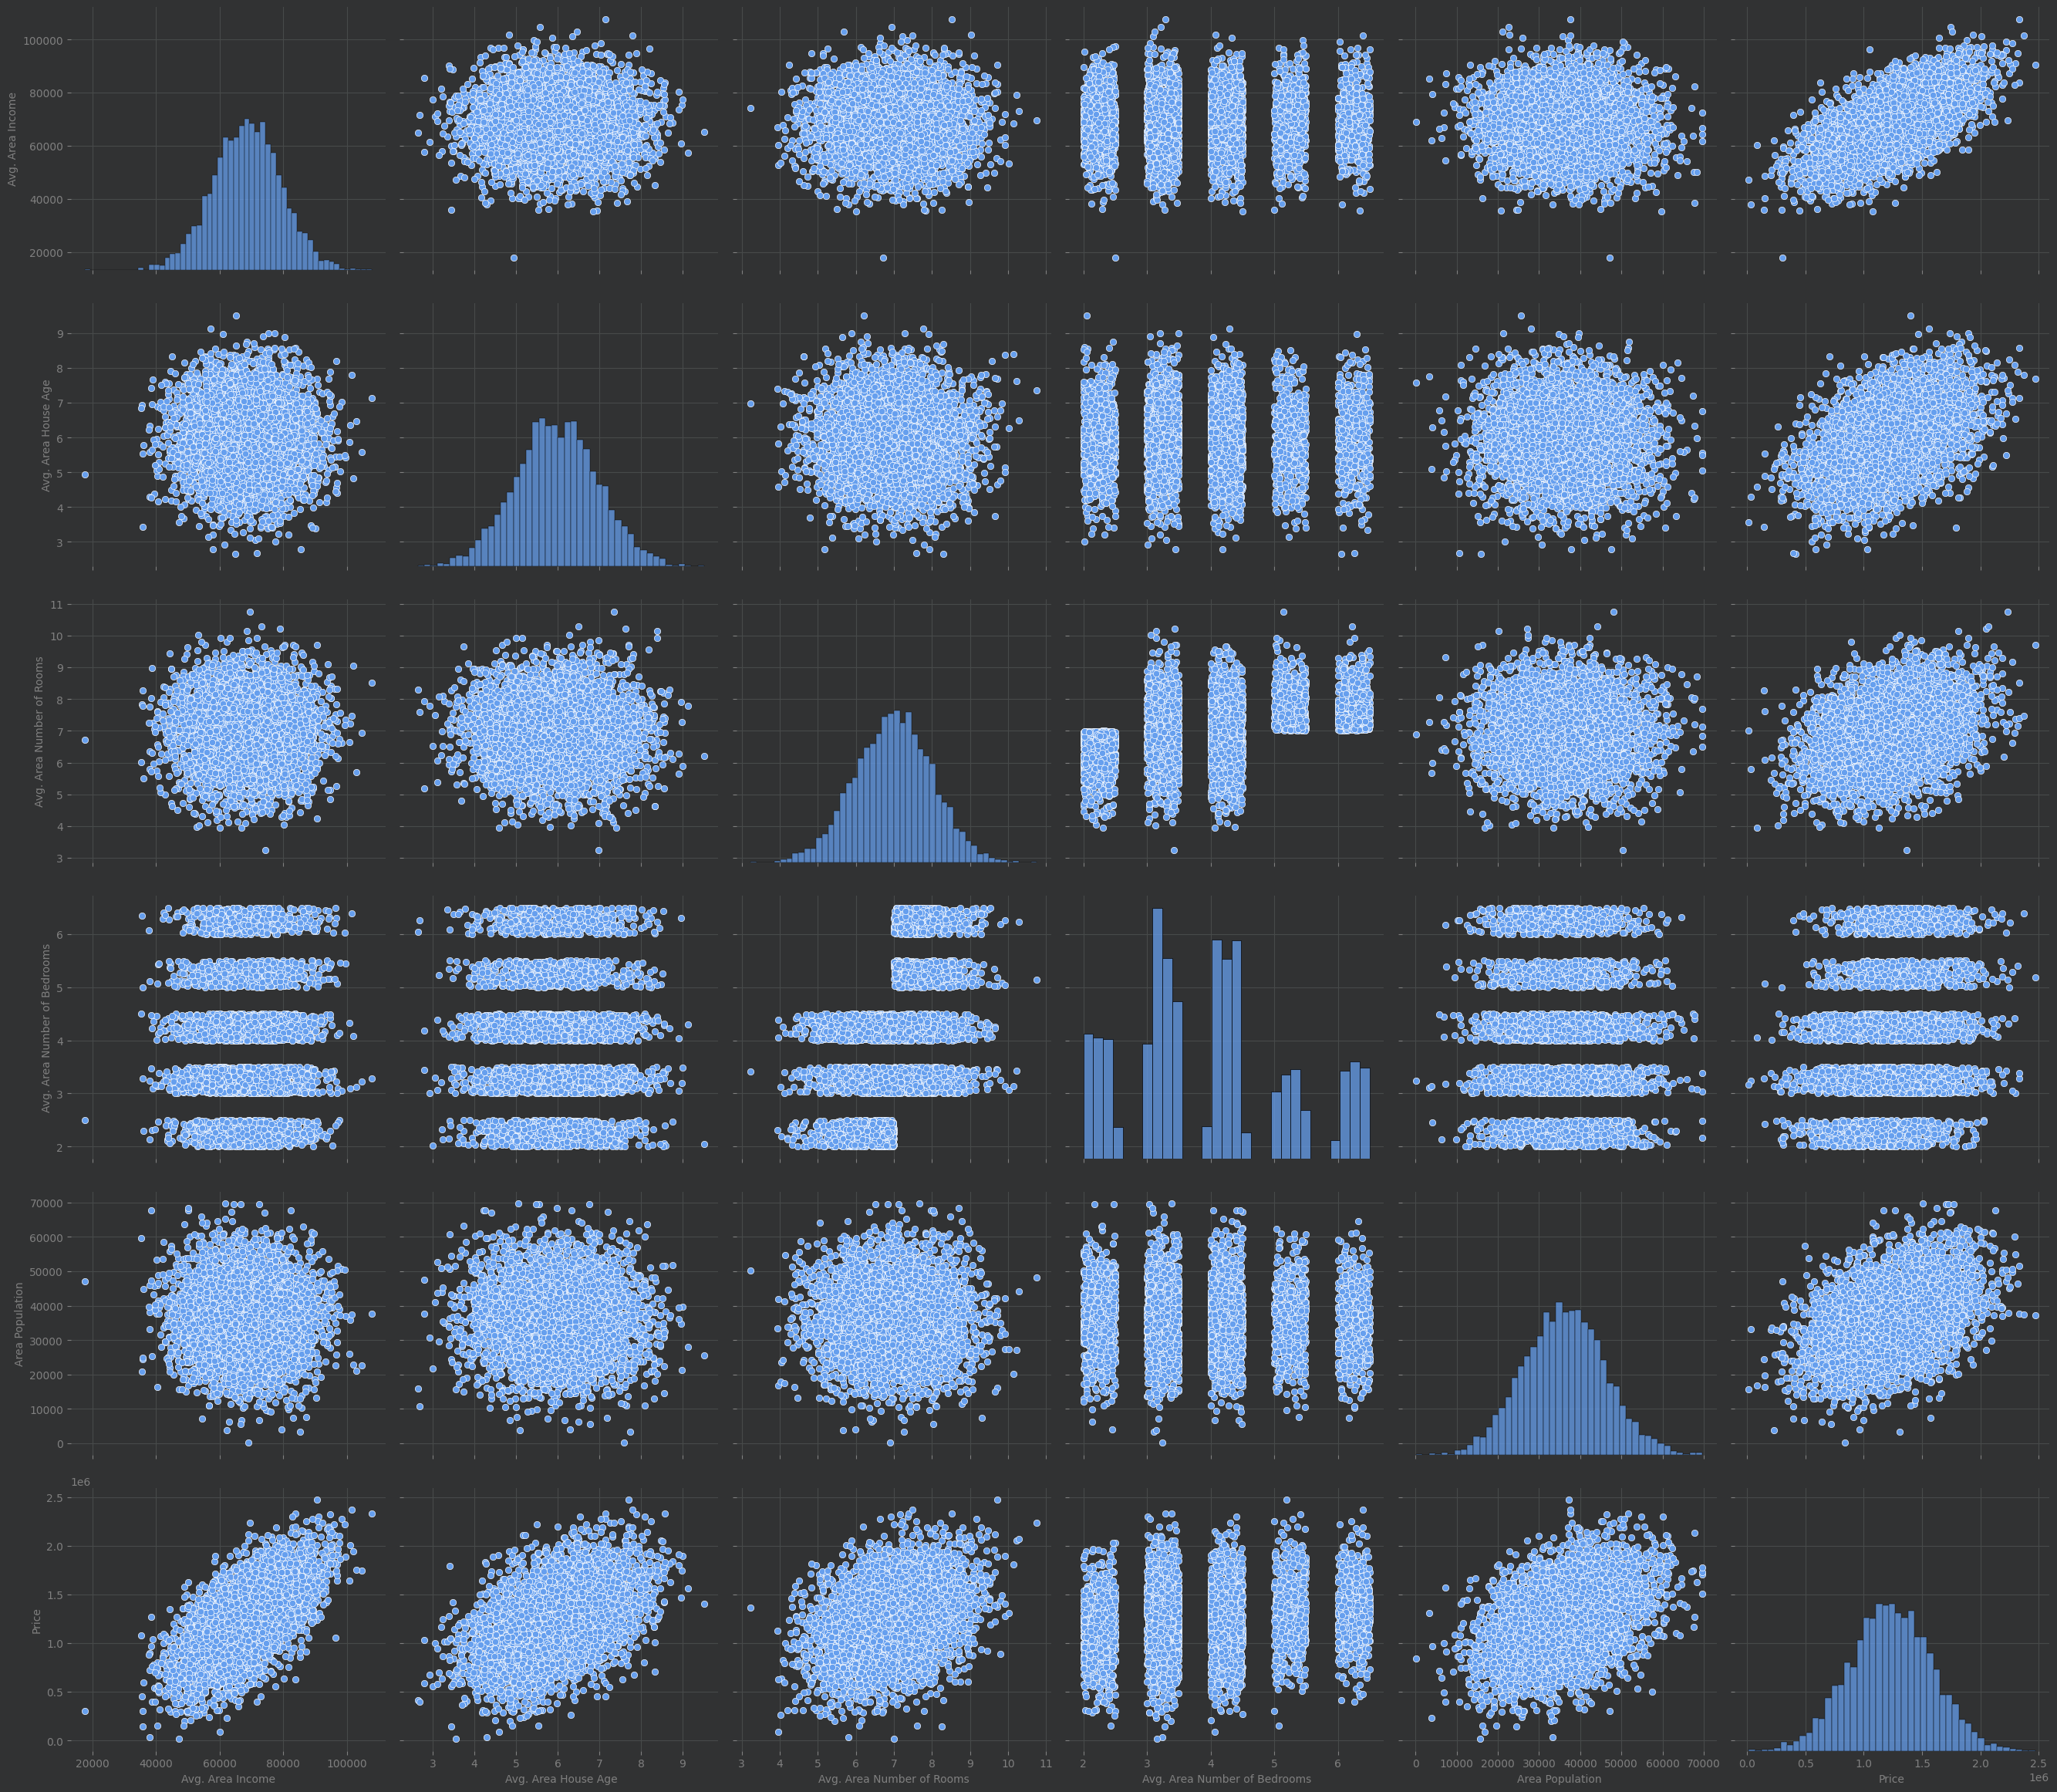

In [87]:
pair_plot = sns.pairplot(data=df)
fig = pair_plot.fig
fig.set_size_inches(28, 24)
plt.show()

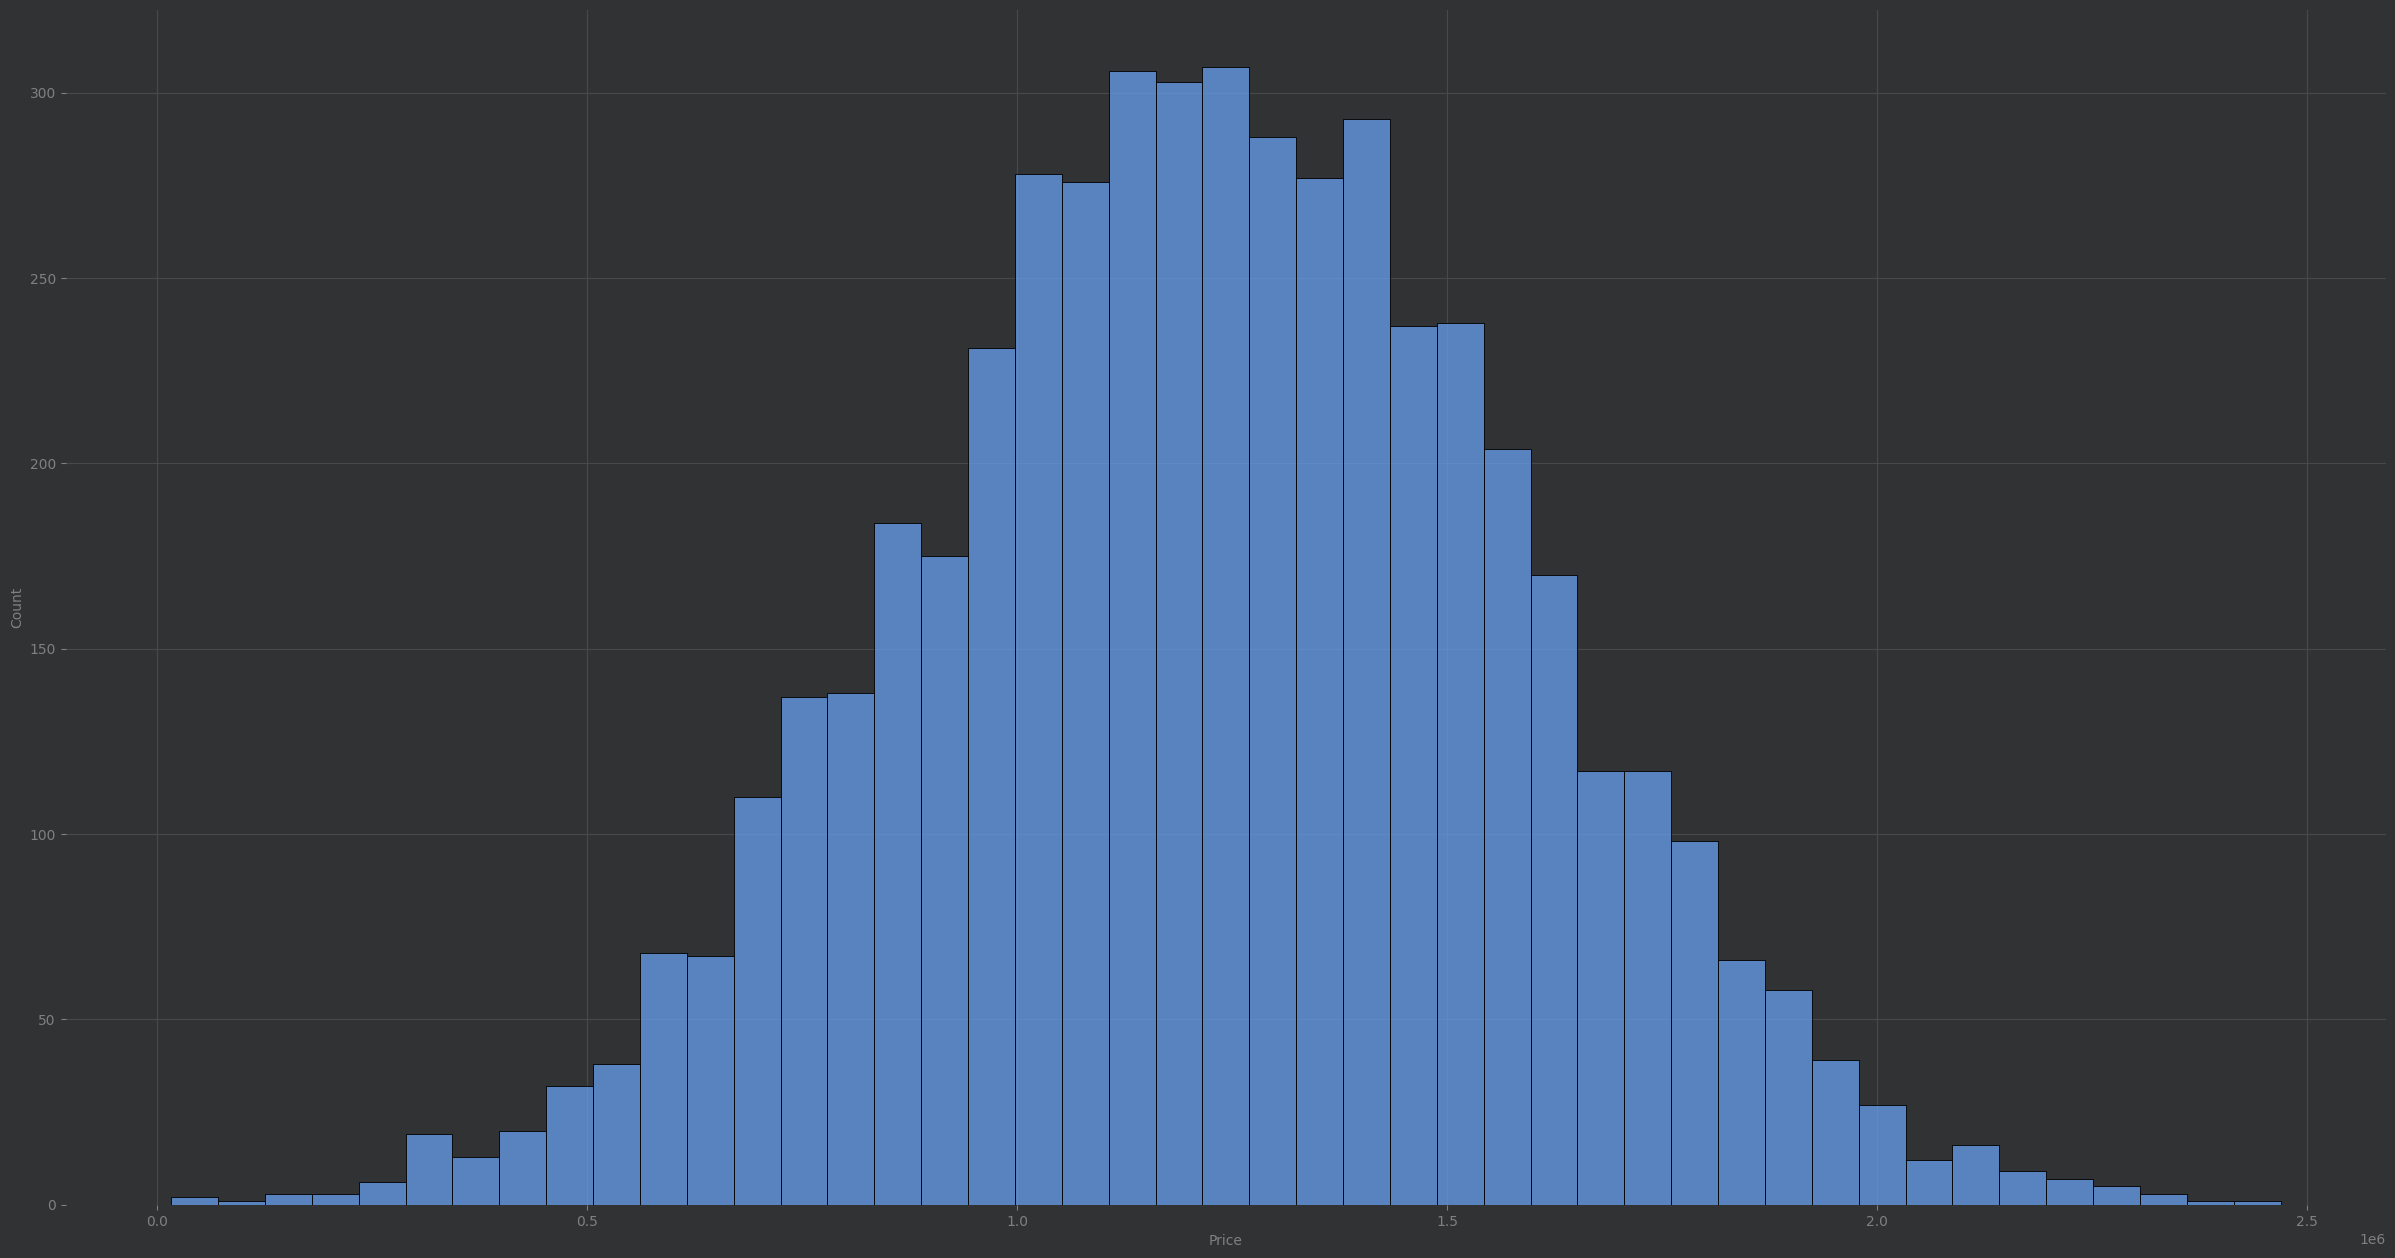

In [88]:
pair_plot = sns.displot(data=df['Price'])
fig = pair_plot.fig
fig.set_size_inches(28, 14)
plt.show()

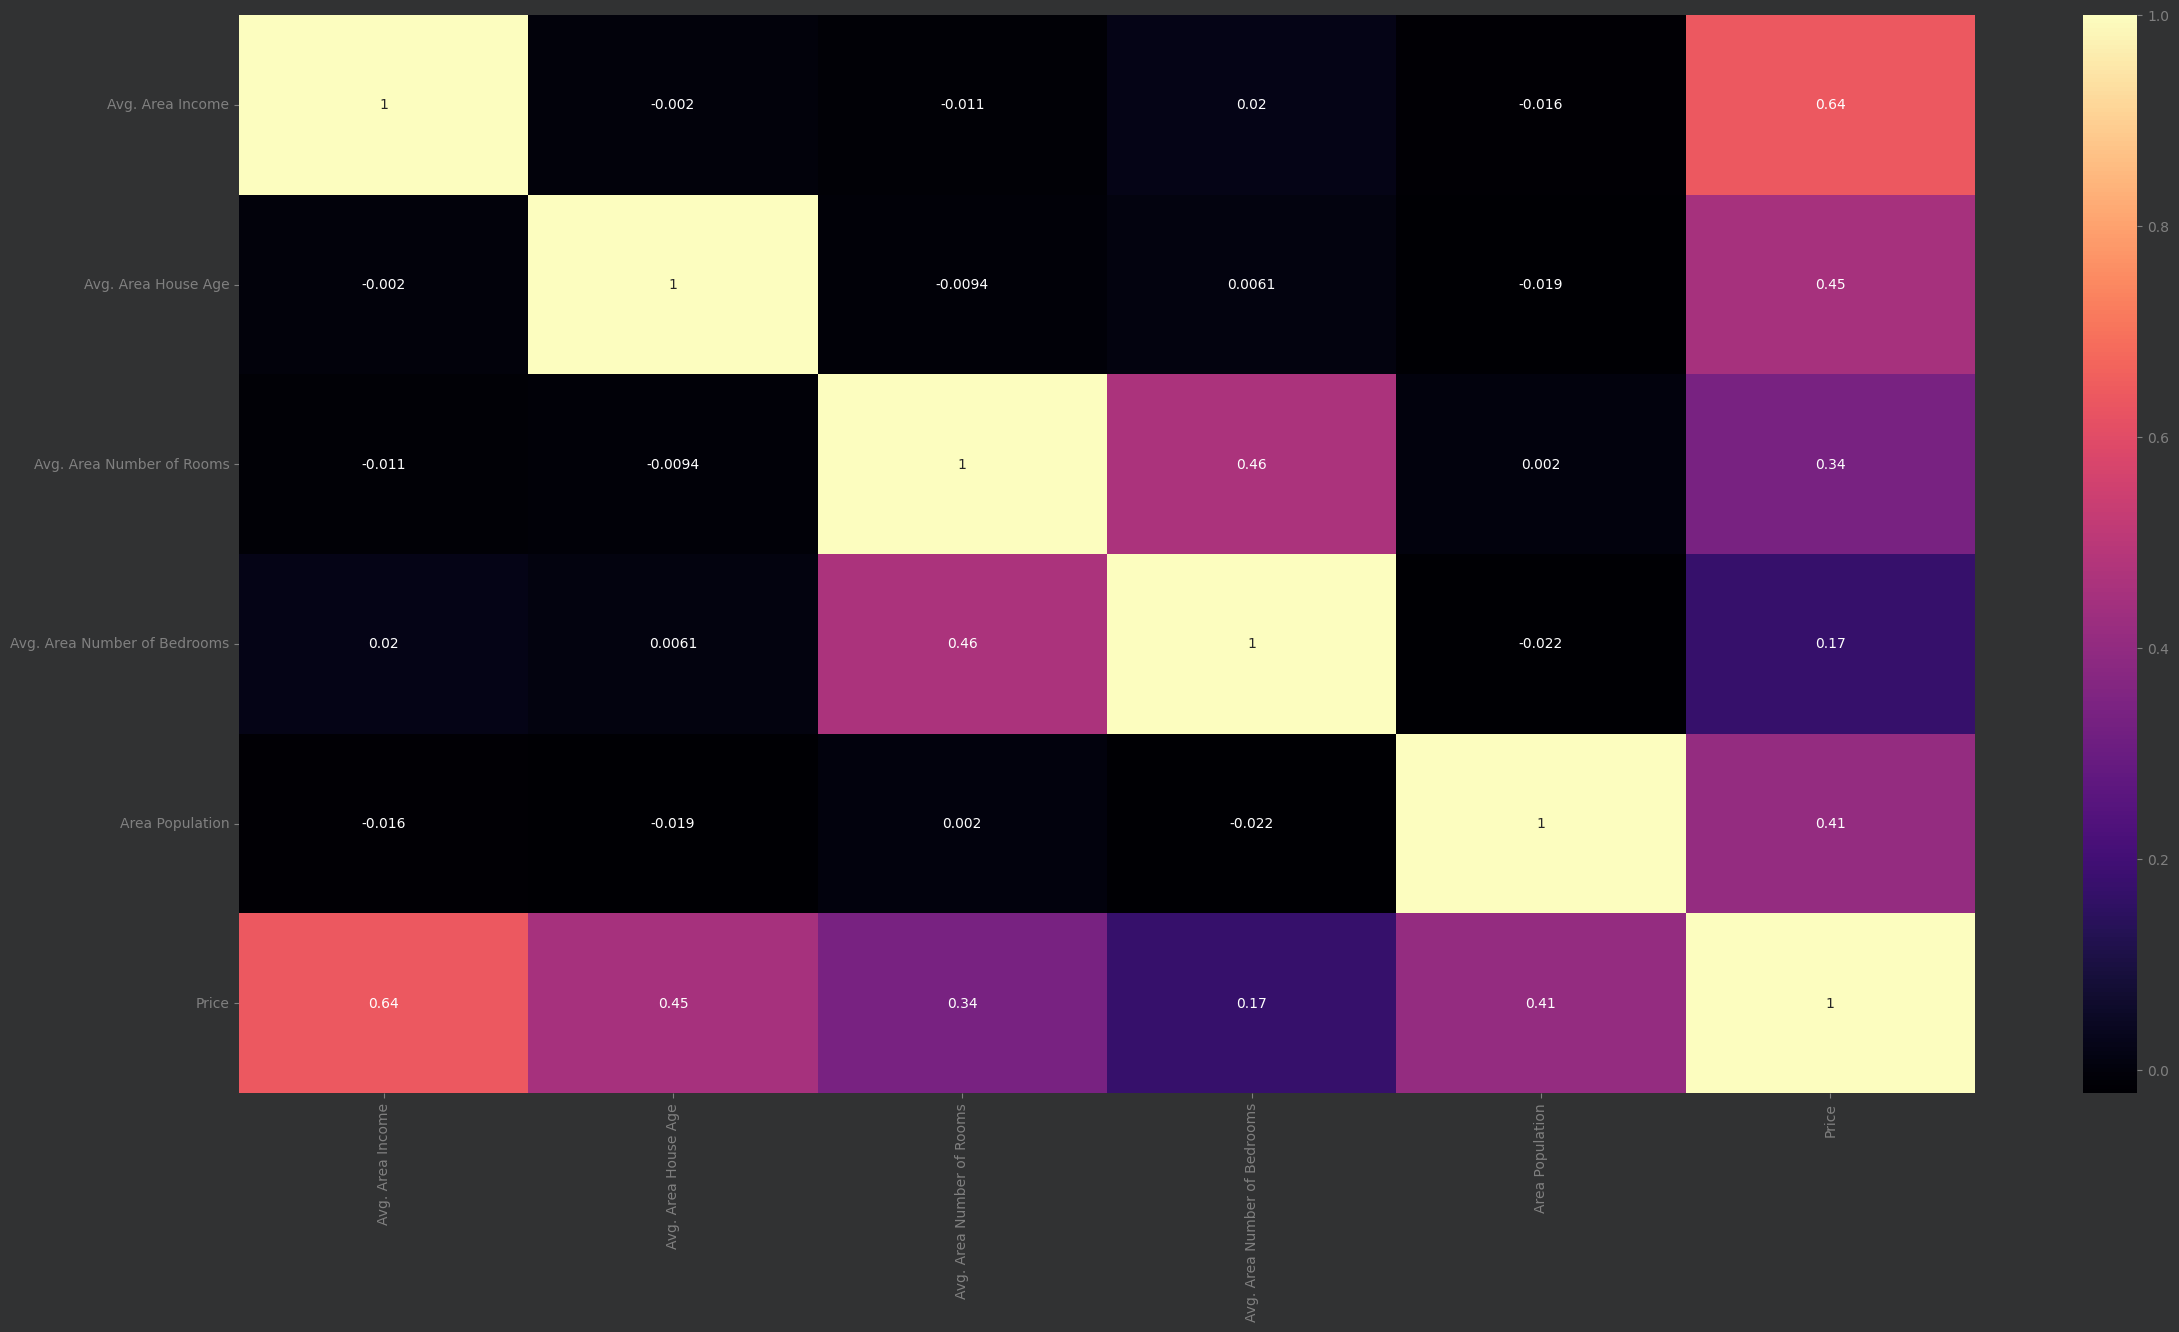

In [89]:
# df.corr() is the correlation between all columns
heatmap_plot = sns.heatmap(df.corr(), annot=True, cmap="magma")
fig = heatmap_plot.figure
fig.set_size_inches(28, 14)
plt.show()

# Predict the price using linear regression

In [90]:
# y is what i want to predict and X is what i have
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]
y = df['Price']

In [91]:
# split data to test and train, 40% for testing and random splits of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
len(X_train), len(X_test), len(y_train), len(y_test)

(3000, 2000, 3000, 2000)

In [92]:
# train the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [93]:
# evaluate the model
print(lm.intercept_)

6.984919309616089e-10


In [94]:
# coef based on columns, a unit increase in the Avg. Area Income is associated with an increase of 6.109337
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coef"])
cdf

,Coef
Avg. Area Income,6.109337e-15
Avg. Area House Age,-5.021650e-11
Avg. Area Number of Rooms,-9.738836e-12
Avg. Area Number of Bedrooms,-4.715805e-12
Area Population,1.040834e-17
Price,1.000000e+00


In [95]:
# predict using the model
predictions = lm.predict(X_test)
predictions

array([1251688.61570287,  873048.31964236, 1696977.6628326 , ...,
        151527.08262656, 1343824.21514432, 1906024.63648501])

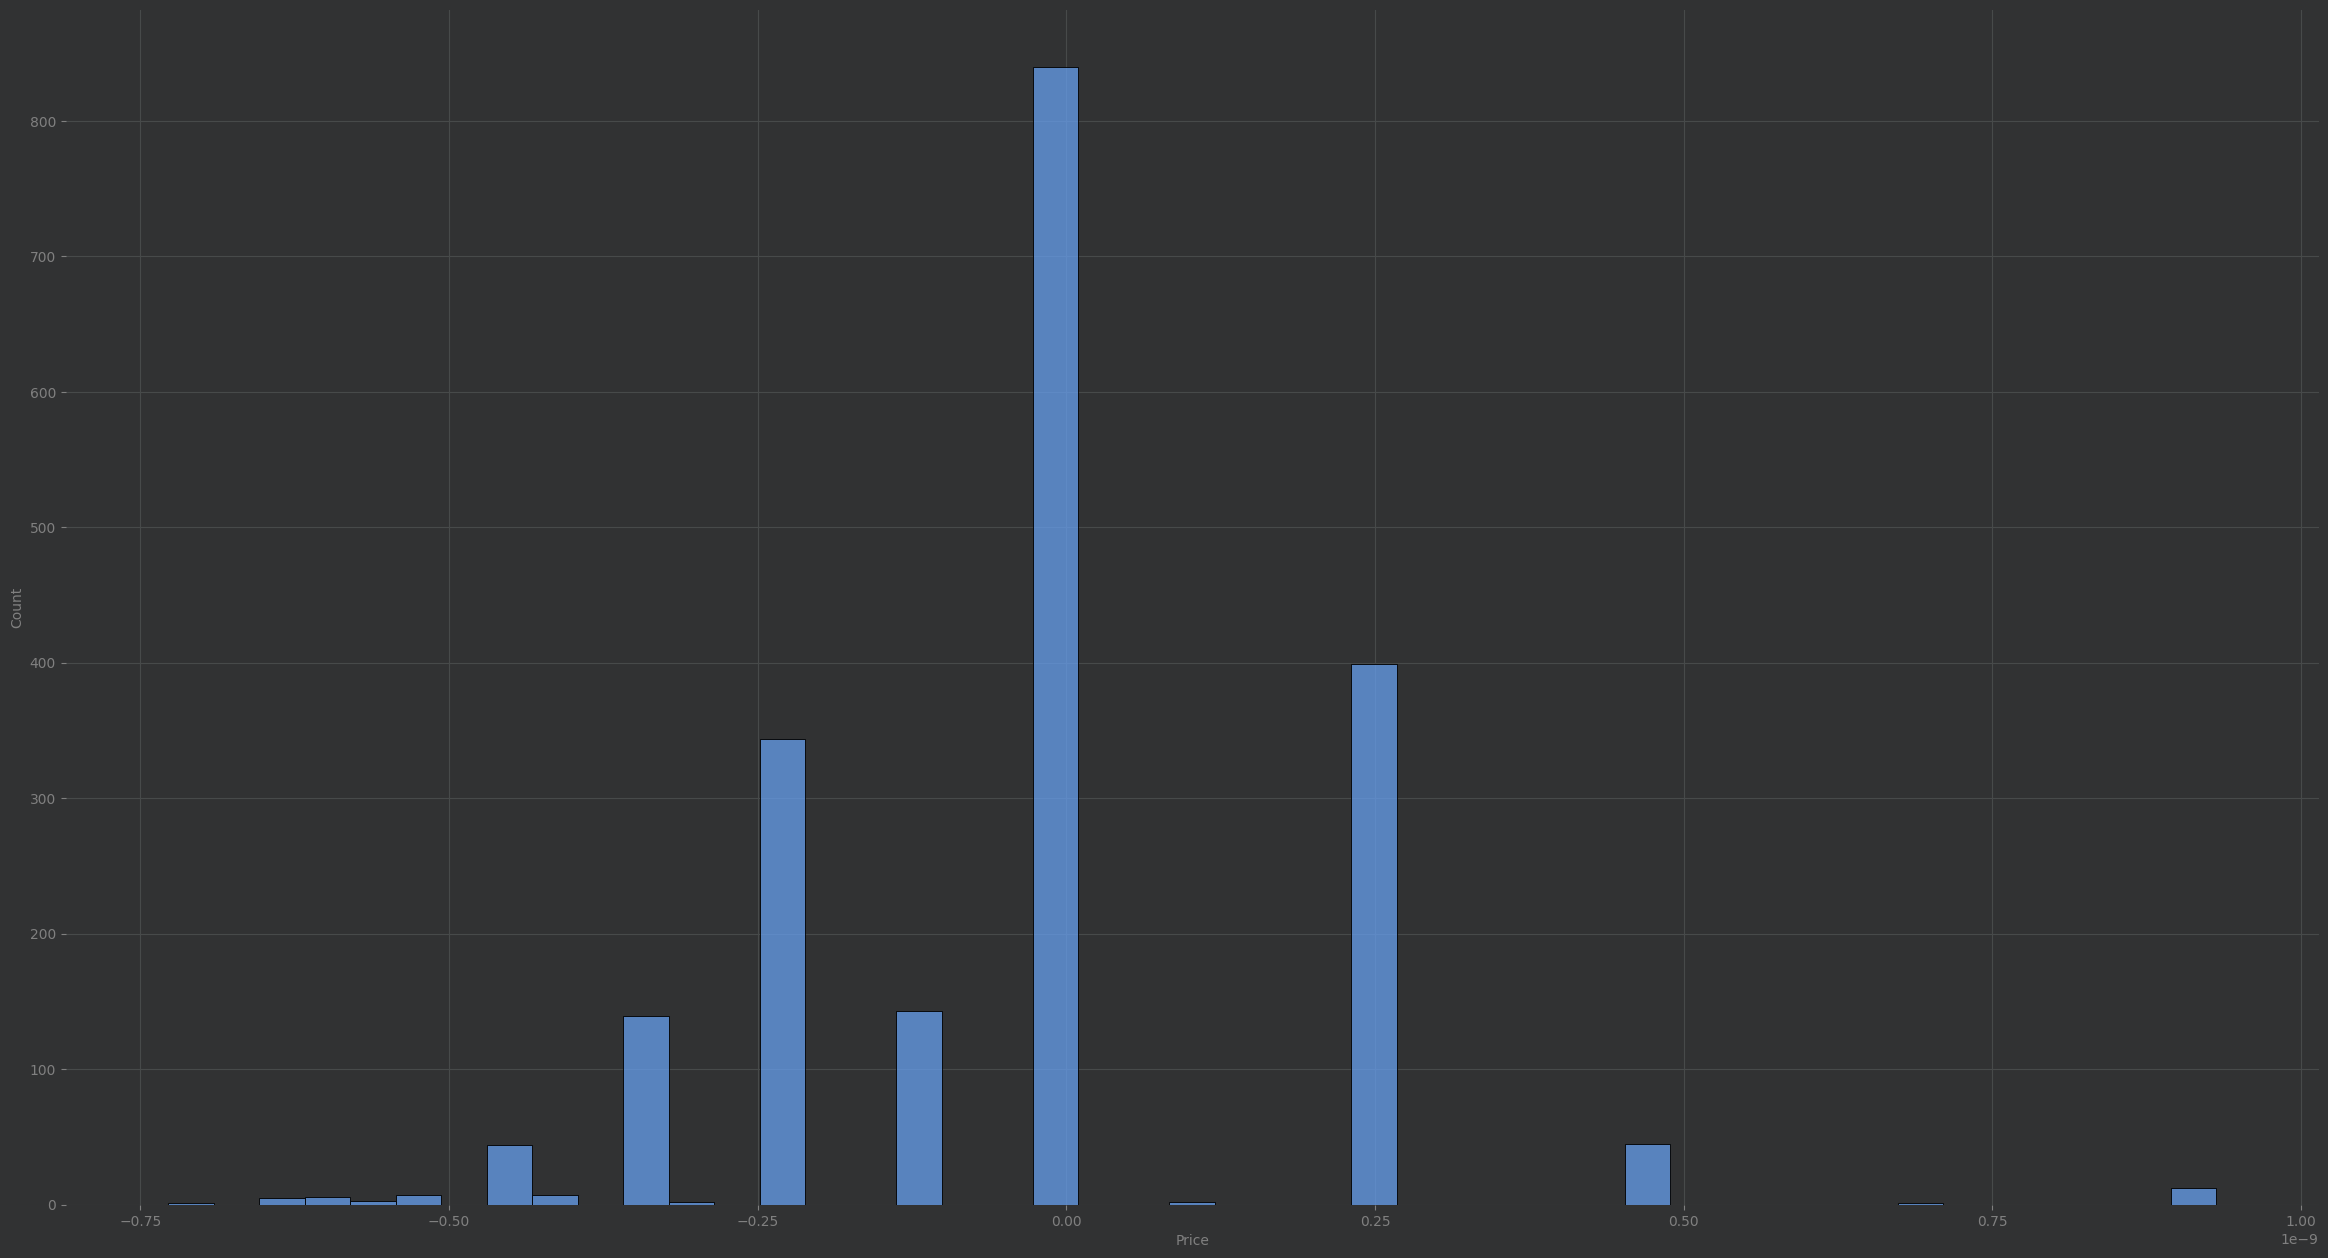

In [100]:
# not so good result for the use of this model
predict_plot = sns.displot((y_test - predictions))
fig = predict_plot.fig
fig.set_size_inches(28, 14)
plt.show()

In [97]:
# MAE metrics
metrics.mean_absolute_error(y_test, predictions)

1.539519871585071e-10

In [98]:
# MSE metrics
metrics.mean_squared_error(y_test, predictions)

4.907804187597982e-20

In [99]:
# RMSE metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.2153564470752742e-10